In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
# Creating a list to make the labels in human readable form
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

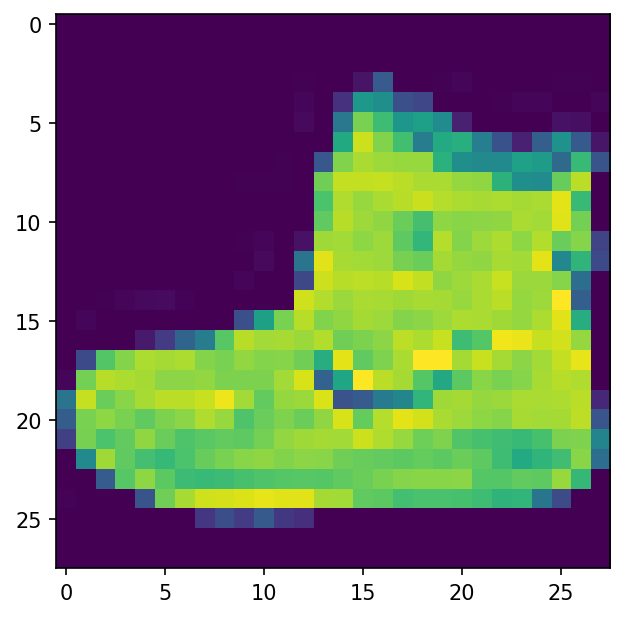

In [6]:
plt.imshow(train_data[0]);

In [7]:
class_names[train_labels[0]]

'Ankle Boot'

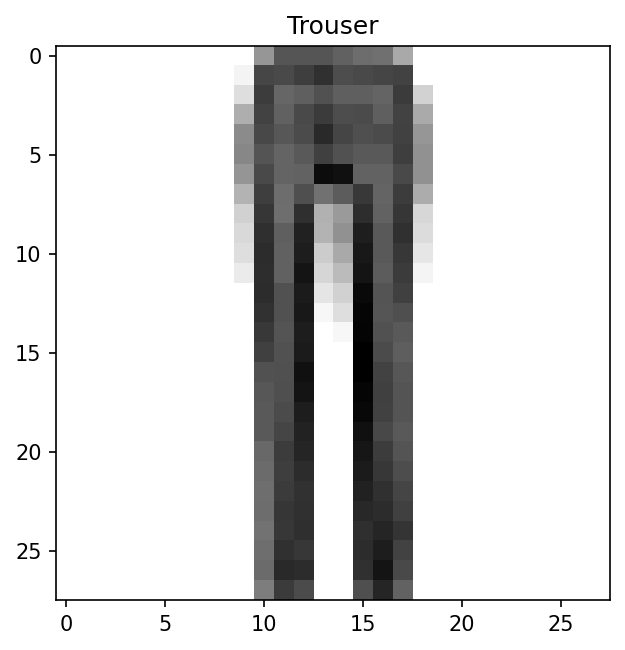

In [8]:
plt.imshow(train_data[69], cmap=plt.cm.binary)
plt.title(class_names[train_labels[69]]);

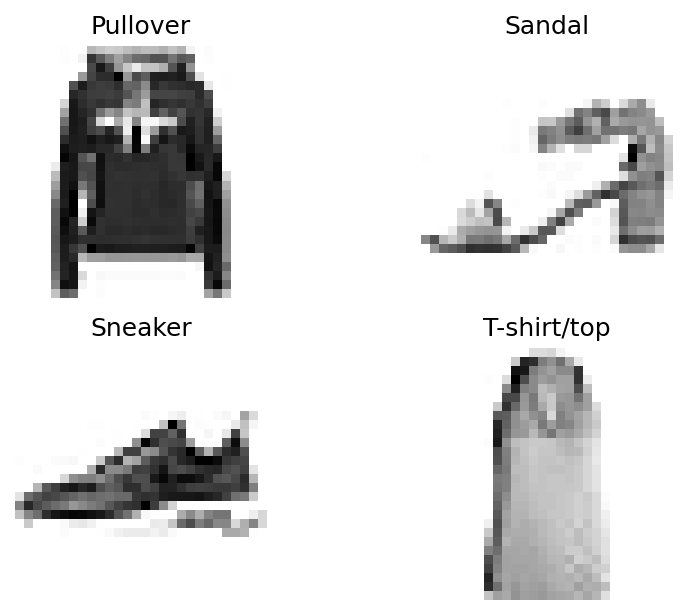

In [9]:
# Plotting multiple random images from the MNIST dataset
import random

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    random_value = random.choice(range(len(train_data)))
    ax.imshow(train_data[random_value], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_value]])
    plt.axis(False)

## Making Our First Model for Multi-Class Classification

For the multi-class classification model, we can use a similar architecture as the binary classification model but it has to have some minor changes.
- Input Shape - **28 x 28**
- Output Shape - **10** (One Per class of clothing)
- Loss Function - `CategoricalCrossEntropy` or `tf.keras.losses.CategoricalCrossEntropy()`
    - If your labels are _OneHot Encoded_ then use `CategorialCrossentropy()`
    - If your labels are not _OneHot Encoded_ then use `SparseCategorialCrossentropy()`
- Output Layer Activation - **Softmax**

In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [5]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(
    optimizer="Adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history_1 = model_1.fit(train_data,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4599 - accuracy: 0.1102 - val_loss: 2.2691 - val_accuracy: 0.1155
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2468 - accuracy: 0.1241 - val_loss: 2.2293 - val_accuracy: 0.1313
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2191 - accuracy: 0.1361 - val_loss: 2.2084 - val_accuracy: 0.1399
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0206 - accuracy: 0.1820 - val_loss: 1.8339 - val_accuracy: 0.1881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7648 - accuracy: 0.2344 - val_loss: 1.7194 - val_accuracy: 0.2551
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6689 - accuracy: 0.2859 - val_loss: 1.6190 - val_accuracy: 0.3052
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6299 - accuracy: 0.2909 - val_loss: 1.5921 - val_accuracy:

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Concept of Scaling or Normalization
- Neural networks prefer when the data that they get is in _normalized_ or _scaled_ form. 
- This means that the **min** and **max** values in the data have to be between **_0_** and **_1_**
- In order to normalize or scale our data, we can simply divide it by the maximum value

In [13]:
train_data.min(), train_data.max()

(0, 255)

In [14]:
# Dividing by the max value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Checking the min and max value of new data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [16]:
# Building a model based on the normal data

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=["accuracy"]
)

history_2 = model_2.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=10,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2170 - accuracy: 0.5438 - val_loss: 0.7842 - val_accuracy: 0.7201
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6739 - accuracy: 0.7556 - val_loss: 0.6524 - val_accuracy: 0.7621
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6156 - accuracy: 0.7813 - val_loss: 0.6260 - val_accuracy: 0.7755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5946 - accuracy: 0.7931 - val_loss: 0.6128 - val_accuracy: 0.7877
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5817 - accuracy: 0.8007 - val_loss: 0.6038 - val_accuracy: 0.7894
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5683 - accuracy: 0.8054 - val_loss: 0.6115 - val_accuracy: 0.7902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5601 - accuracy: 0.8087 - val_loss: 0.5884 - val_accuracy:

> Neural Networks tend to prefer data in normalized form and numerical form (between 0 and 1)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

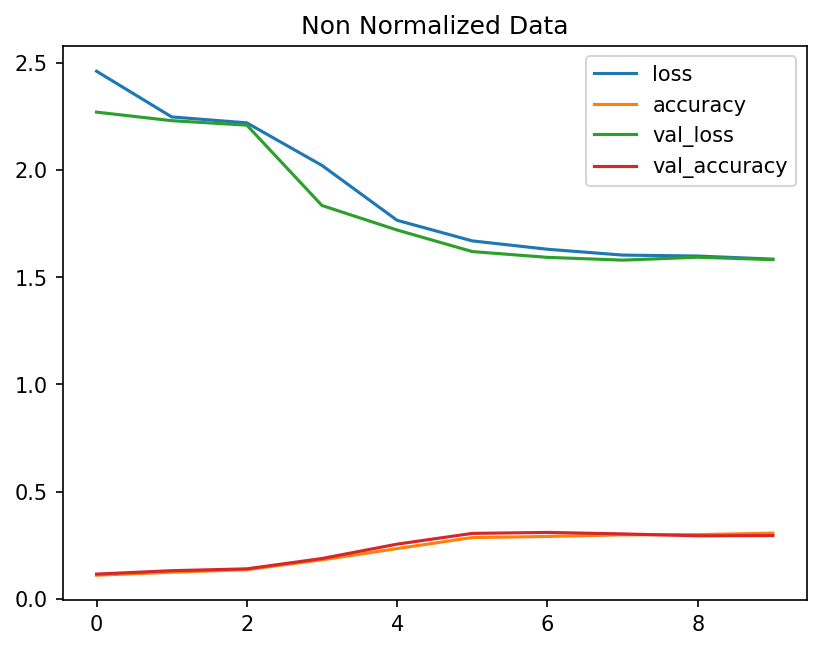

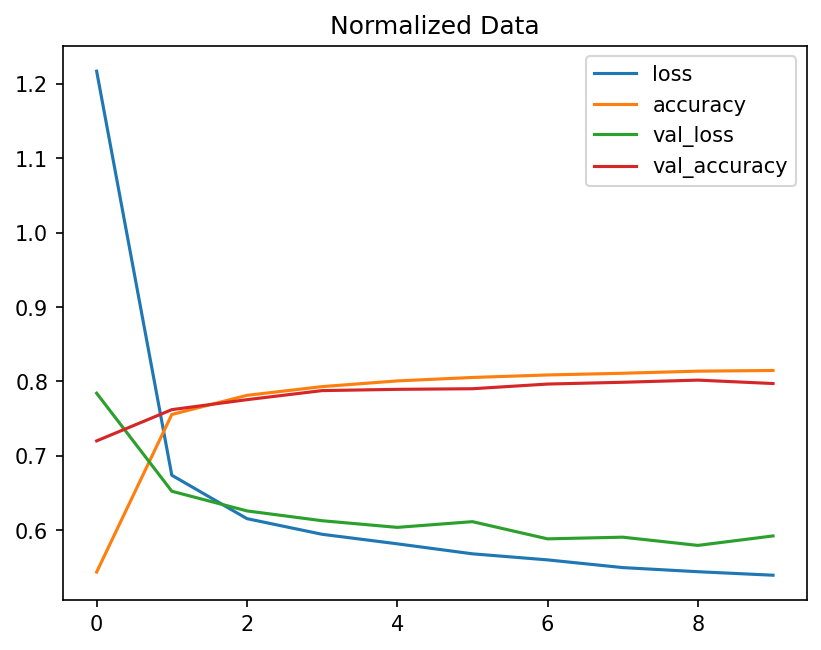

In [24]:
pd.DataFrame(history_1.history).plot(title="Non Normalized Data")
pd.DataFrame(history_2.history).plot(title="Normalized Data")
plt.show()